Actividad 1. Análisis de Texto. Introducción

Indicaciones:

Requisitos
- Realizar un análisis estadístico sobre algún origen de datos textual (libros, publicaciones en redes sociales, entradas de blog, discursos políticos...) sobre dos o más fuentes de uno o más autores.

- Analizar estadística descriptiva básica, frecuencias, distribuciones de palabras, n-gramas, uso de signos de puntuación, emojis...

- Comparar las diversas fuentes y aventurar conclusiones a partir de los hallazgos en un reporte científico (de preferencia hecho en Latex; si no en Markdown como readme.md del repositorio).

- Sube a tu repositorio el código utilizado en tu tarea y el reporte en PDF (y TEX si aplica) en una carpeta claramente identificada.

In [1]:
!pip install gutenbergpy

In [2]:
# Librerias e imports
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from gutenbergpy.textget import get_text_by_id, strip_headers
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# En lugar de definir el libro en el metodo, se deja el metodo libre para ingresar cualquier id
def obtener_libro(id):
    raw_book = get_text_by_id(id)  # Texto con encabezados
    clean_book = strip_headers(raw_book)  # Texto limpio sin encabezados
    return clean_book.decode('utf-8'), raw_book.decode('utf-8')  # Decodificar bytes a string para utilizar las librerias

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Descargar el libro
# 1661 Aventuras de Sherlock Holmes
clean_book_1, raw_book_1 = obtener_libro(1342) # Libro de Orgullo y Perjuicio
clean_book_2, raw_book_2 = obtener_libro(158) # Libro de Sherlock Holmes -- 158 Emma del mismo autor de Orgullo y Perjuicio

In [4]:
# Procesar el texto - Tokenizar el texto
tokens_1 = word_tokenize(clean_book_1.lower())  # Convertir a minúsculas
tokens_2 = word_tokenize(clean_book_2.lower())  # Convertir a minúsculas

In [5]:
# Filtrar palabras vacías y caracteres no alfabéticos
stop_words = set(stopwords.words('english')) #Este stop_words se reutilizara para los 2 libros.
filtered_tokens_1 = [word for word in tokens_1 if word.isalpha() and word not in stop_words] #Tokens libro 1
filtered_tokens_2 = [word for word in tokens_2 if word.isalpha() and word not in stop_words] #Tokens libro 2

In [6]:
print("Cantidad de palabras en Libro 1")
print(len(filtered_tokens_1))
print("Cantidad de palabras en Libro 2")
print(len(filtered_tokens_2))

Cantidad de palabras en Libro 1
55253
Cantidad de palabras en Libro 2
67209


In [7]:
# Logica de negocio Libro 1 y 2
# Steming
stemmer = PorterStemmer()
stems_1 = [stemmer.stem(word) for word in filtered_tokens_1]

# Lemmatización
lemmatizer = WordNetLemmatizer()
lemmas_1 = [lemmatizer.lemmatize(word) for word in filtered_tokens_1]

# Frecuencia de palabras Uso de lenmas y stems
frecuencia_palabras_lenmas_1 = Counter(lemmas_1) 
frecuencia_palabras_stem_1 = Counter(stems_1) 

# ----- Libro 2 ----
stems_2 = [stemmer.stem(word) for word in filtered_tokens_2]

# Lemmatización
lemmas_2 = [lemmatizer.lemmatize(word) for word in filtered_tokens_2]

# Frecuencia de palabras Uso de lenmas y stems
frecuencia_palabras_lenmas_2 = Counter(lemmas_2) 
frecuencia_palabras_stem_2 = Counter(stems_2) 

In [8]:
# Calcular la frecuencia de n-gramas utilizando las palabras tokenizadas
# Como segundo parametro es sobre si queremos bigrama, trigramas, etc. El usado en clase fue el n = 2 (bigramas)
def obtener_ngramas(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])  # Genera n-gramas
    ngram_freq = Counter(ngrams)
    return ngram_freq

In [9]:
print("Palabras mas comunes con lenmas en el Libro 1:")
print(frecuencia_palabras_lenmas_1.most_common(10))

print("Palabras mas comunes con lenmas en el Libro 2:")
print(frecuencia_palabras_lenmas_2.most_common(10))

Palabras mas comunes con lenmas en el Libro 1:
[('elizabeth', 643), ('could', 529), ('would', 482), ('darcy', 424), ('said', 406), ('bennet', 346), ('much', 332), ('miss', 315), ('must', 311), ('bingley', 307)]
Palabras mas comunes con lenmas en el Libro 2:
[('could', 825), ('emma', 820), ('would', 809), ('miss', 581), ('must', 562), ('harriet', 475), ('much', 469), ('said', 469), ('thing', 439), ('weston', 434)]


In [10]:
# Palabras mas comunes con lenmas
print("Palabras mas comunes con stems en el Libro 1:")
print(frecuencia_palabras_stem_1.most_common(10))

# Palabras mas comunes con lenmas
print("Palabras mas comunes con stems en el Libro 2:")
print(frecuencia_palabras_stem_2.most_common(10))

Palabras mas comunes con stems en el Libro 1:
[('elizabeth', 643), ('could', 529), ('would', 482), ('darci', 424), ('said', 406), ('bennet', 346), ('much', 332), ('miss', 319), ('bingley', 313), ('must', 311)]
Palabras mas comunes con stems en el Libro 2:
[('could', 825), ('emma', 820), ('would', 809), ('miss', 592), ('must', 562), ('harriet', 475), ('much', 469), ('said', 469), ('think', 460), ('thing', 439)]


In [11]:
# Imprimir ngramas de los libros filtered tokens de cada libro _1 y _2
bigramas_1 = obtener_ngramas(filtered_tokens_1, 2)
print("10 Bigramas mas comunes en el libro 1:")
print(bigramas_1.most_common(10))

bigramas_2 = obtener_ngramas(filtered_tokens_2, 2)
print("10 Bigramas mas comunes en el libro 2:")
print(bigramas_2.most_common(10))

10 Bigramas mas comunes en el libro 1:
[(('lady', 'catherine'), 122), (('miss', 'bingley'), 87), (('miss', 'bennet'), 67), (('said', 'elizabeth'), 46), (('sir', 'william'), 44), (('de', 'bourgh'), 40), (('miss', 'darcy'), 39), (('young', 'man'), 37), (('colonel', 'fitzwilliam'), 30), (('dare', 'say'), 28)]
10 Bigramas mas comunes en el libro 2:
[(('miss', 'woodhouse'), 157), (('frank', 'churchill'), 141), (('miss', 'fairfax'), 119), (('every', 'thing'), 117), (('miss', 'bates'), 108), (('every', 'body'), 104), (('jane', 'fairfax'), 100), (('young', 'man'), 79), (('great', 'deal'), 62), (('said', 'emma'), 62)]


In [12]:
# Obtener las frecuencias de las palabras más comunes libro 1
top_lenmas_1 = [count for word, count in frecuencia_palabras_lenmas_1.most_common(10)]
top_stems_1 = [count for word, count in frecuencia_palabras_stem_1.most_common(10)]
words_lenmas_1 = [word for word, count in frecuencia_palabras_lenmas_1.most_common(10)]
words_stems_1 = [word for word, count in frecuencia_palabras_stem_1.most_common(10)]

# Obtener las frecuencias de las palabras más comunes libro 2
top_lenmas_2 = [count for word, count in frecuencia_palabras_lenmas_2.most_common(10)]
top_stems_2 = [count for word, count in frecuencia_palabras_stem_2.most_common(10)]
words_lenmas_2 = [word for word, count in frecuencia_palabras_lenmas_2.most_common(10)]
words_stems_2 = [word for word, count in frecuencia_palabras_stem_2.most_common(10)]

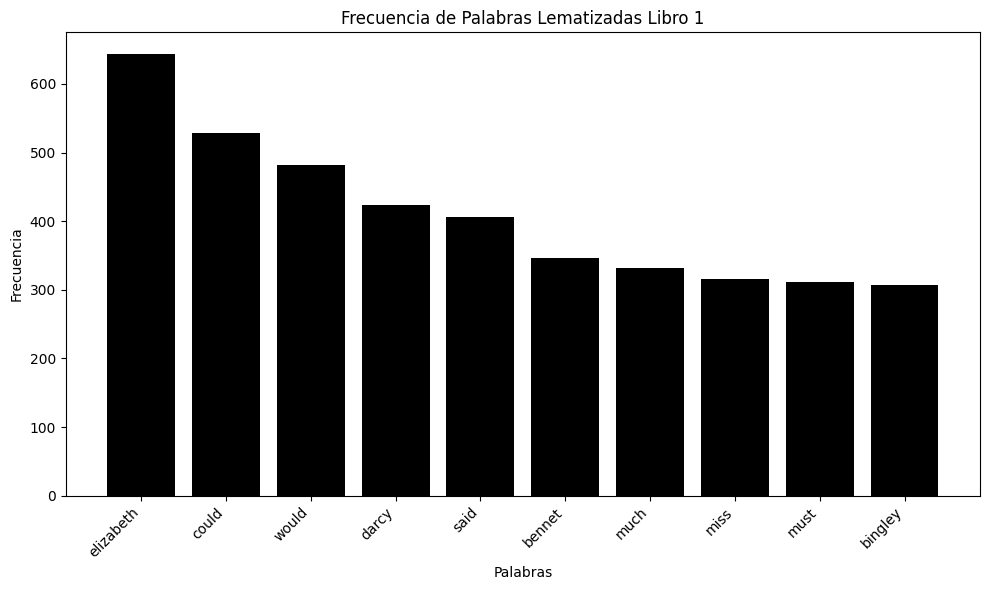

In [13]:
df_lenmas = pd.DataFrame({'token': words_lenmas_1, 'conteo': top_lenmas_1})

# Gráfica Lematizadas
plt.figure(figsize=(10, 6))
plt.bar(df_lenmas['token'], df_lenmas['conteo'], color='black')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Palabras Lematizadas Libro 1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

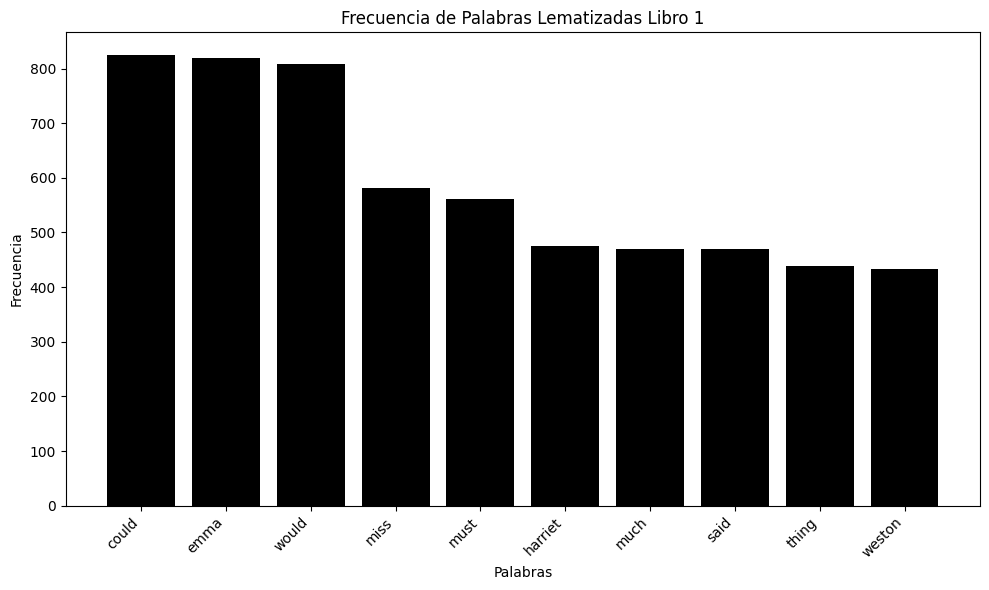

In [14]:
df_lenmas = pd.DataFrame({'token': words_lenmas_2, 'conteo': top_lenmas_2})

# Gráfica Lematizadas
plt.figure(figsize=(10, 6))
plt.bar(df_lenmas['token'], df_lenmas['conteo'], color='black')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Palabras Lematizadas Libro 1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Se utilizan ambos data frame
# DataFrame para Libro 1
df_lenmas_1 = pd.DataFrame({'token': words_lenmas_1, 'conteo': top_lenmas_1, 'libro': 'Libro 1'})

# DataFrame para Libro 2
df_lenmas_2 = pd.DataFrame({'token': words_lenmas_2, 'conteo': top_lenmas_2, 'libro': 'Libro 2'})

# Combina ambos DataFrames
df_combined = pd.concat([df_lenmas_1, df_lenmas_2])

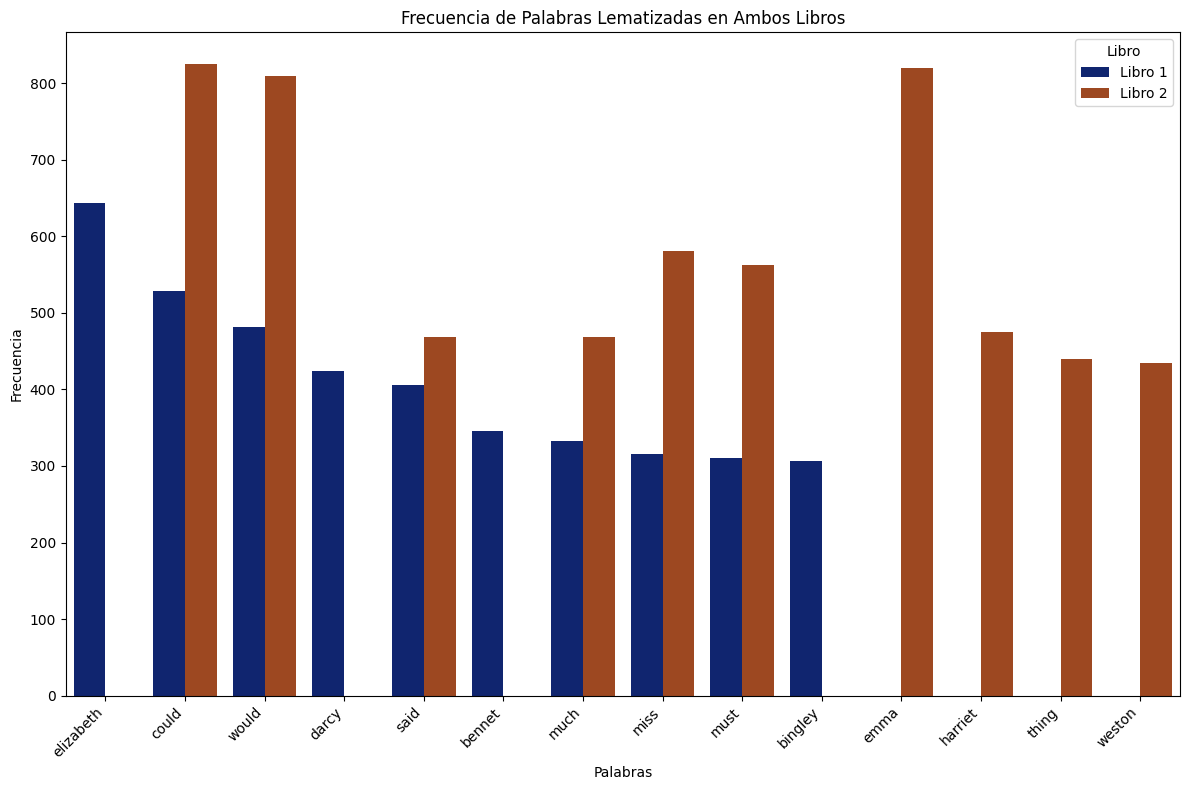

In [16]:
import seaborn as sns

# Gráfica combinada
plt.figure(figsize=(12, 8))
sns.barplot(data=df_combined, x='token', y='conteo', hue='libro', palette='dark')

# Configuración de la gráfica
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Palabras Lematizadas en Ambos Libros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Libro')
plt.show()


Se puede visualizar que mientras en un libro la palabra que mas frecuencia tiene es Elizabeth, en el otro es Emma

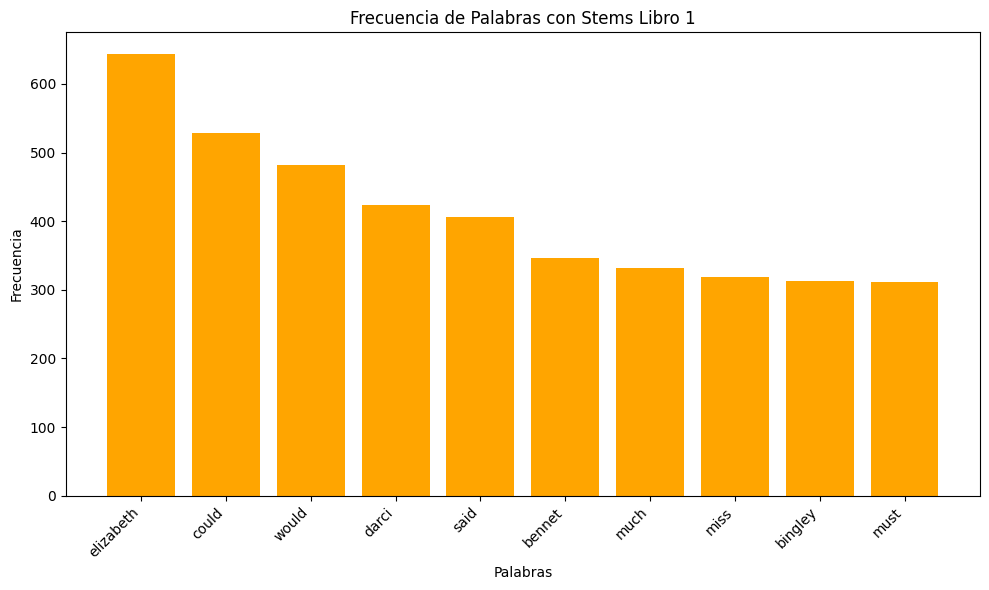

In [17]:
# Grafica de barras sobre Stems en el libro 1
import pandas as pd

df_stems_1 = pd.DataFrame({'token': words_stems_1, 'conteo': top_stems_1})

# Grafica de barras Steam
plt.figure(figsize=(10, 6))
plt.bar(df_stems_1['token'], df_stems_1['conteo'], color='orange')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Palabras con Stems Libro 1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

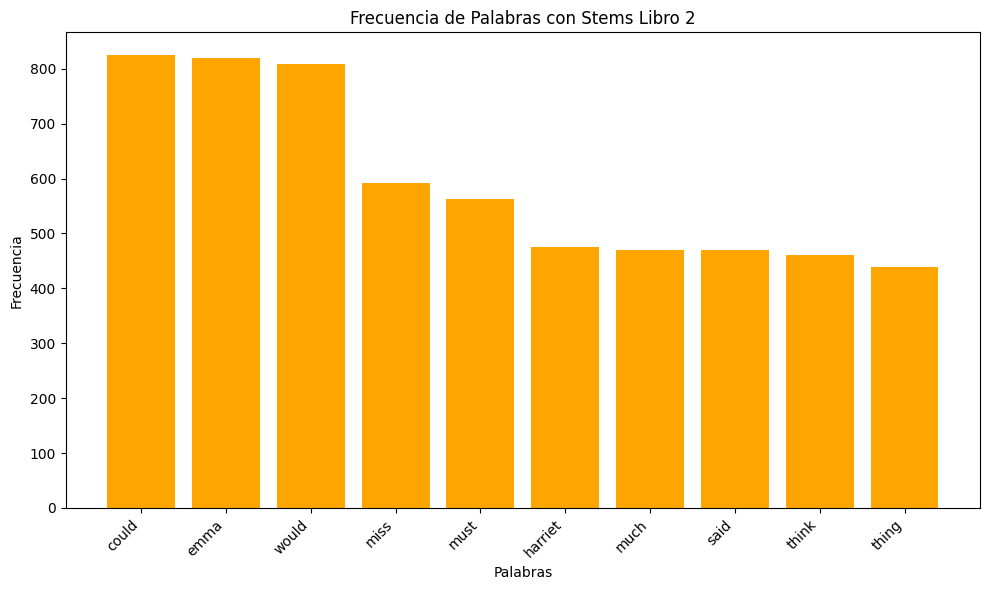

In [18]:
# Grafica de barras sobre Stems en el libro 2
df_stems_2 = pd.DataFrame({'token': words_stems_2, 'conteo': top_stems_2})

# Grafica de barras Steam
plt.figure(figsize=(10, 6))
plt.bar(df_stems_2['token'], df_stems_2['conteo'], color='orange')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Palabras con Stems Libro 2')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

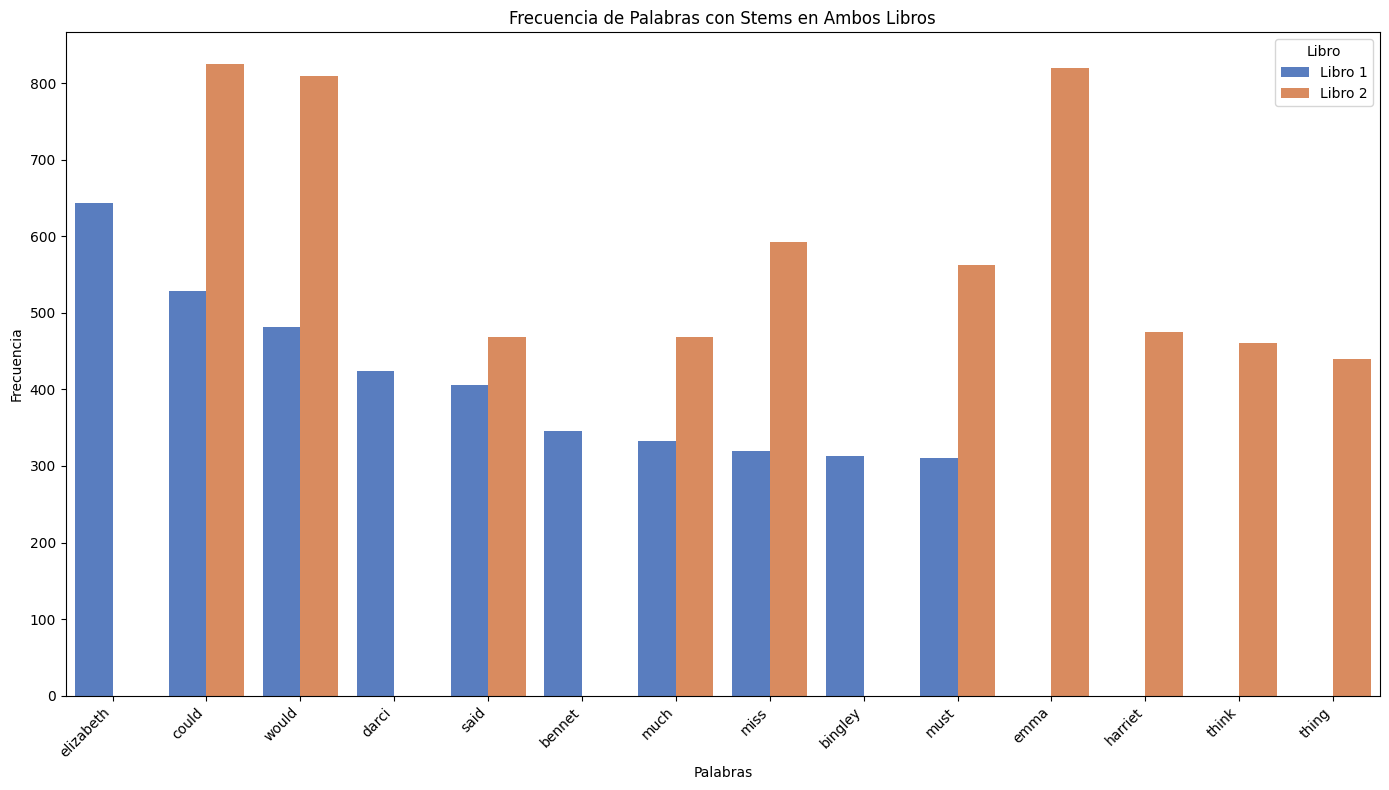

In [19]:
# Crear DataFrames para Stems de ambos libros
df_stems_1['libro'] = 'Libro 1'
df_stems_2['libro'] = 'Libro 2'

# Combinar los datos de ambos libros
df_combined_stems = pd.concat([df_stems_1, df_stems_2])

# Gráfica combinada de stems
plt.figure(figsize=(14, 8))
sns.barplot(data=df_combined_stems, x='token', y='conteo', hue='libro', palette='muted')

# Configuración de la gráfica
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Palabras con Stems en Ambos Libros')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Libro', loc='upper right')
plt.tight_layout()
plt.show()


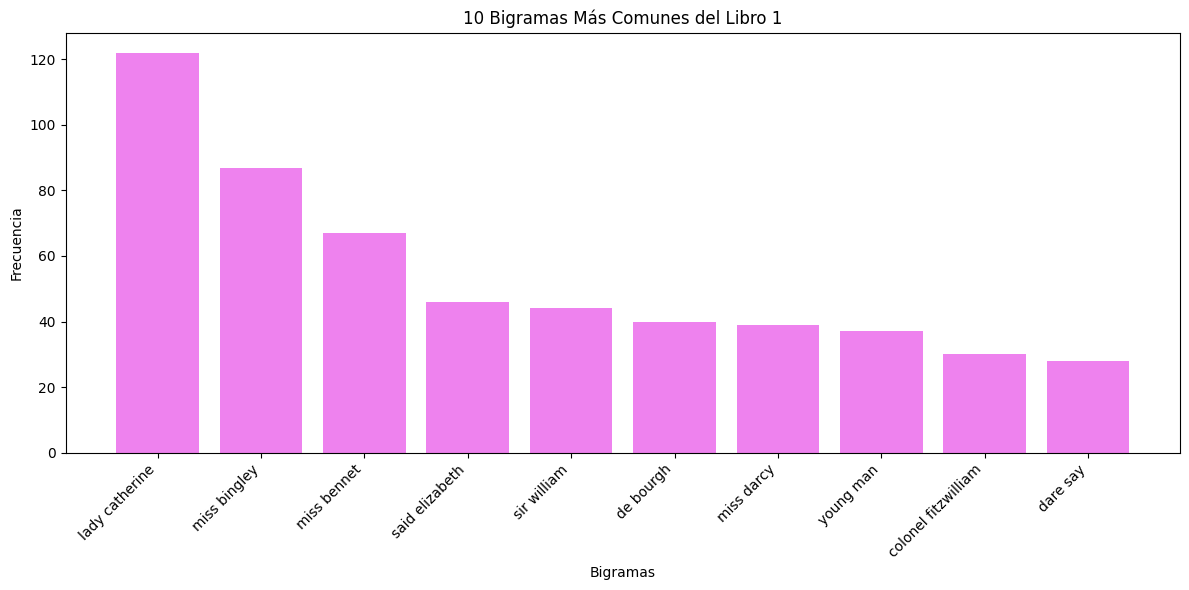

In [20]:
from collections import Counter

# Extraer los 10 bigramas mas comunes, convertirlo a data frame
top_bigrams_1 = bigramas_1.most_common(10)
df_bigrams_1 = pd.DataFrame(top_bigrams_1, columns=['bigram', 'frecuencia'])

plt.figure(figsize=(12, 6))

# Plot de los bigramas más comunes
plt.bar([' '.join(bigram) for bigram in df_bigrams_1['bigram']], df_bigrams_1['frecuencia'], color='violet')
plt.xlabel('Bigramas')
plt.ylabel('Frecuencia')
plt.title('10 Bigramas Más Comunes del Libro 1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

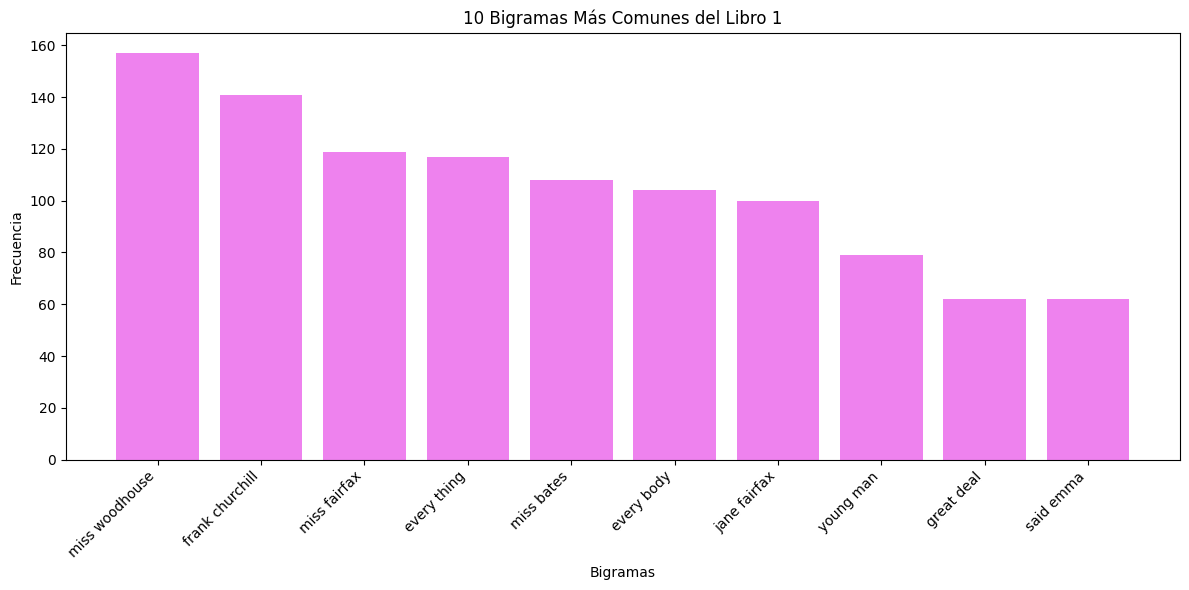

In [21]:
# Extraer los 10 bigramas mas comunes libro 2
top_bigrams_2 = bigramas_2.most_common(10)
df_bigrams_2 = pd.DataFrame(top_bigrams_2, columns=['bigram', 'frecuencia'])

plt.figure(figsize=(12, 6))

# Plot de los bigramas más comunes
plt.bar([' '.join(bigram) for bigram in df_bigrams_2['bigram']], df_bigrams_2['frecuencia'], color='violet')
plt.xlabel('Bigramas')
plt.ylabel('Frecuencia')
plt.title('10 Bigramas Más Comunes del Libro 1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

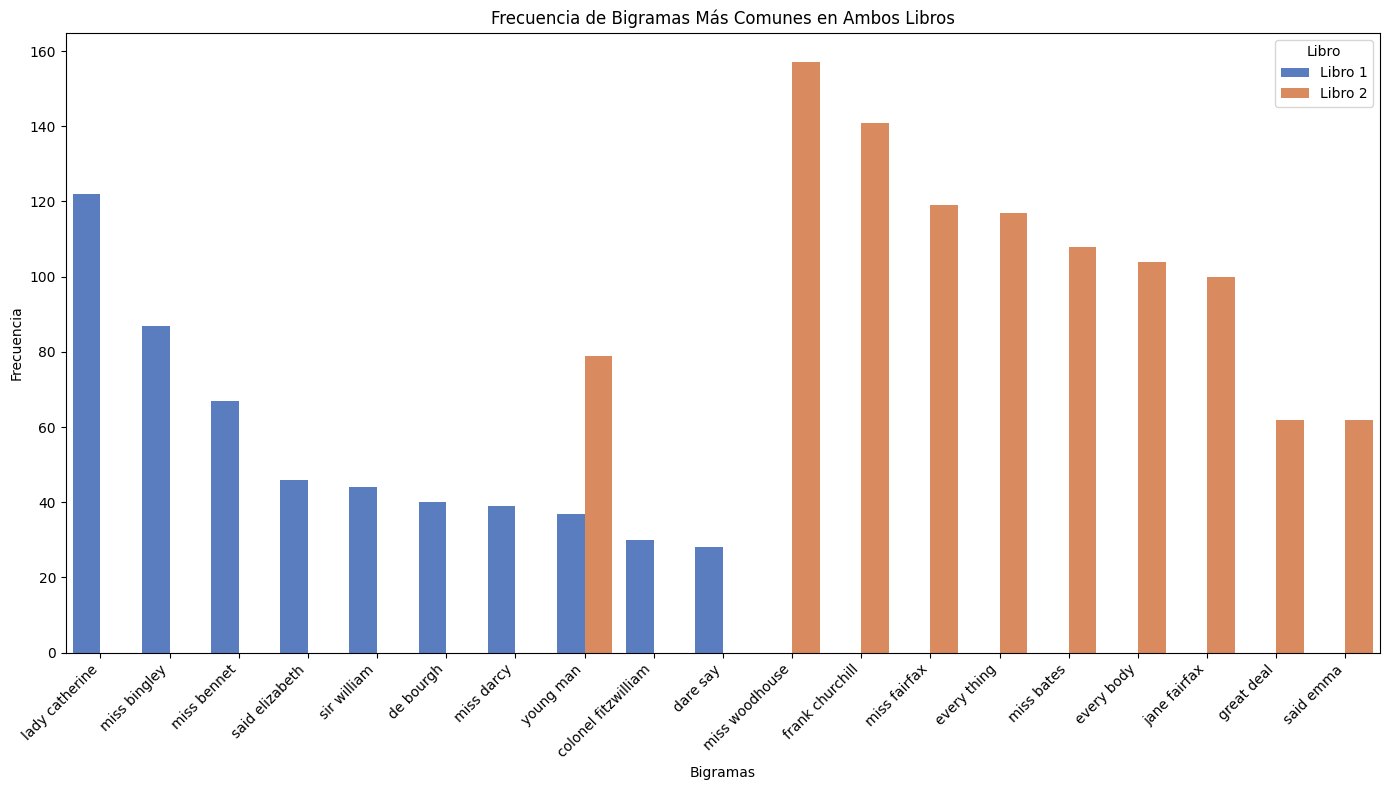

In [22]:
# Combinar datos
df_bigrams_1['libro'] = 'Libro 1'
df_bigrams_2['libro'] = 'Libro 2'
df_combined_bigrams = pd.concat([df_bigrams_1, df_bigrams_2])

# Convertir los bigramas a texto para graficar
df_combined_bigrams['bigram_text'] = df_combined_bigrams['bigram'].apply(lambda x: ' '.join(x))

# Gráfica combinada de bigramas
plt.figure(figsize=(14, 8))
sns.barplot(data=df_combined_bigrams, x='bigram_text', y='frecuencia', hue='libro', palette='muted')

# Configuración de la gráfica
plt.xlabel('Bigramas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Bigramas Más Comunes en Ambos Libros')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Libro', loc='upper right')
plt.tight_layout()
plt.show()


Respecto a los 10 biagramas mas comunes, solo tienen semejanzas en el young man, sin embargo la frecuencia es mas alta en el Libro 2

In [23]:
# Crear DataFrames de frecuencias (Stems y Lemas)
df_freq_stems = pd.concat([df_stems_1, df_stems_2], keys=['Libro 1', 'Libro 2'], names=['Libro'])
df_freq_lemmas = pd.concat([df_bigrams_1, df_bigrams_2], keys=['Libro 1', 'Libro 2'], names=['Libro'])

# Estadísticas descriptivas para stems y lemas de ambos concatenados
stems_desc = df_freq_stems['conteo'].describe()
lemmas_desc = df_freq_lemmas['frecuencia'].describe()

print("Estadísticas descriptivas para Stems:")
print(stems_desc)

print("\nEstadísticas descriptivas para Lemas:")
print(lemmas_desc)

Estadísticas descriptivas para Stems:
count     20.000000
mean     501.250000
std      164.679553
min      311.000000
25%      391.000000
50%      469.000000
75%      569.500000
max      825.000000
Name: conteo, dtype: float64

Estadísticas descriptivas para Lemas:
count     20.000000
mean      79.450000
std       39.544079
min       28.000000
25%       43.000000
50%       73.000000
75%      110.250000
max      157.000000
Name: frecuencia, dtype: float64


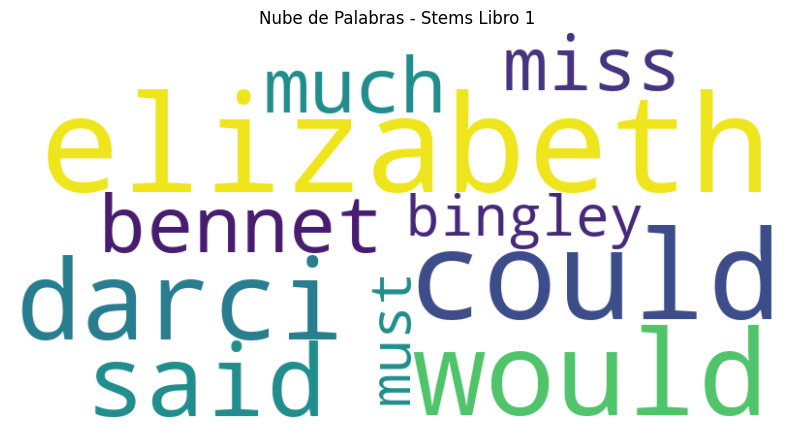

In [24]:
from wordcloud import WordCloud

# Nube de palabras para stems del libro 1
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    df_stems_1.set_index('token')['conteo'].to_dict()
)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Stems Libro 1')
plt.show()

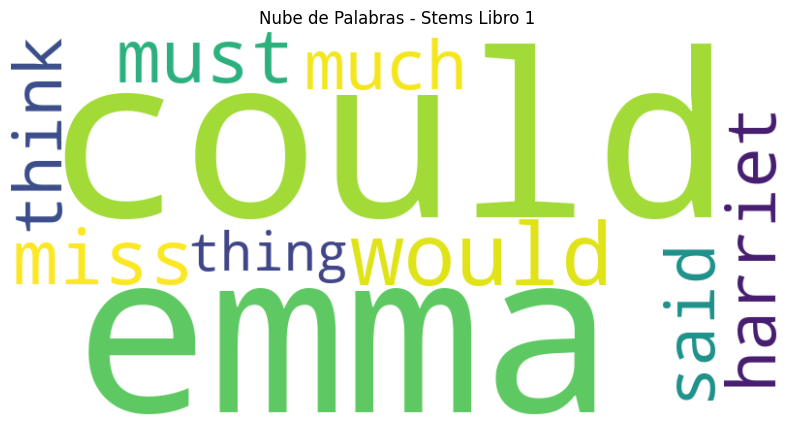

In [25]:
# Nube de palabras para stems del libro 1
wordcloud_2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    df_stems_2.set_index('token')['conteo'].to_dict()
)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Stems Libro 1')
plt.show()

Signos de puntuación en el Libro 1: [(',', 9850), ('.', 6452), (';', 1704), ('-', 1361), ('_', 1096), ('?', 479), ('!', 425), (':', 279), ('[', 197), (']', 197)]
Signos de puntuación en el Libro 2: [(',', 12020), ('.', 8939), (';', 2353), ('!', 1063), ('_', 728), ('?', 621), ('-', 574), (':', 174), ('(', 107), (')', 107)]


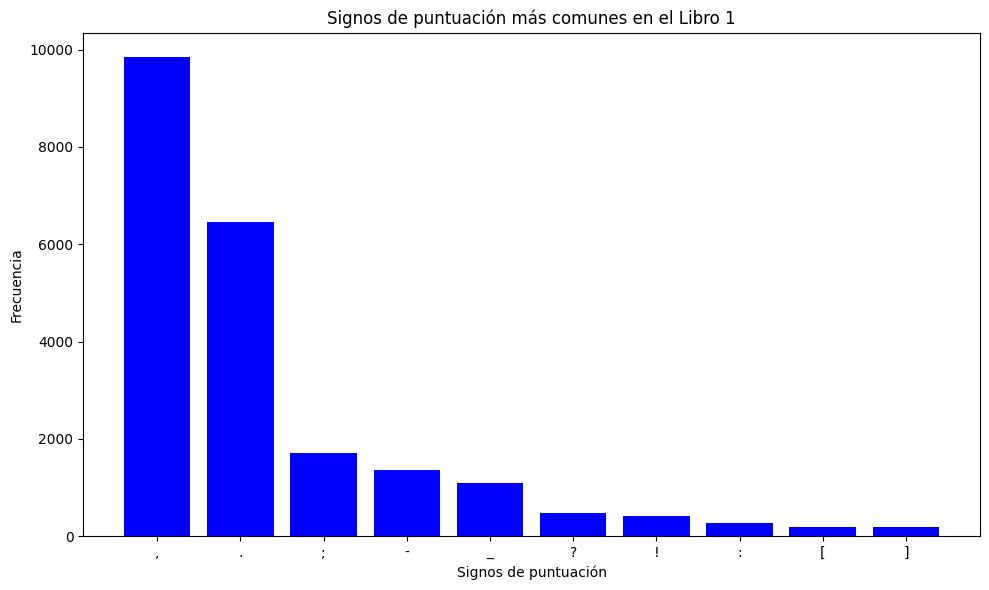

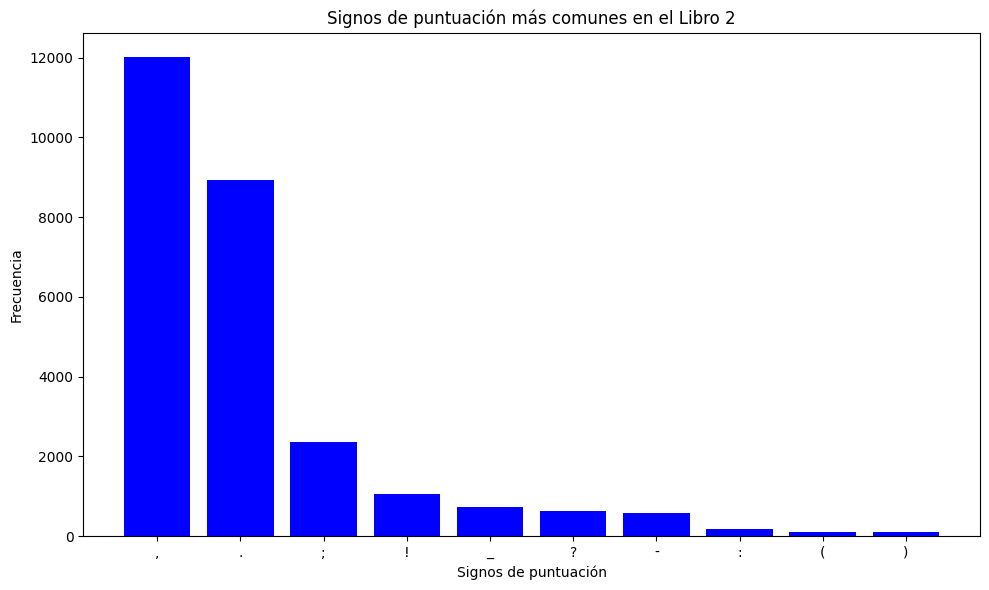

In [28]:
import string
import emoji
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Extraer signos de puntuación
def analizar_signos_puntuacion(libro):
    signos = [char for char in libro if char in string.punctuation]
    return Counter(signos)

# Extraer emojis
def analizar_emojis(libro):
    emojis = [char for char in libro if char in emoji.EMOJI_DATA]
    return Counter(emojis)

# Obtener datos de los libros
signos_1 = analizar_signos_puntuacion(clean_book_1)
signos_2 = analizar_signos_puntuacion(clean_book_2)

emojis_1 = analizar_emojis(clean_book_1)
emojis_2 = analizar_emojis(clean_book_2)

# Mostrar resultados en consola
print("Signos de puntuación en el Libro 1:", signos_1.most_common(10))
print("Signos de puntuación en el Libro 2:", signos_2.most_common(10))

# Crear gráficos de signos de puntuación
def graficar_signos(signos, titulo):
    df_signos = pd.DataFrame(signos.most_common(10), columns=['Signo', 'Frecuencia'])
    plt.figure(figsize=(10, 6))
    plt.bar(df_signos['Signo'], df_signos['Frecuencia'], color='blue')
    plt.xlabel('Signos de puntuación')
    plt.ylabel('Frecuencia')
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

# Graficar resultados
graficar_signos(signos_1, 'Signos de puntuación más comunes en el Libro 1')
graficar_signos(signos_2, 'Signos de puntuación más comunes en el Libro 2')

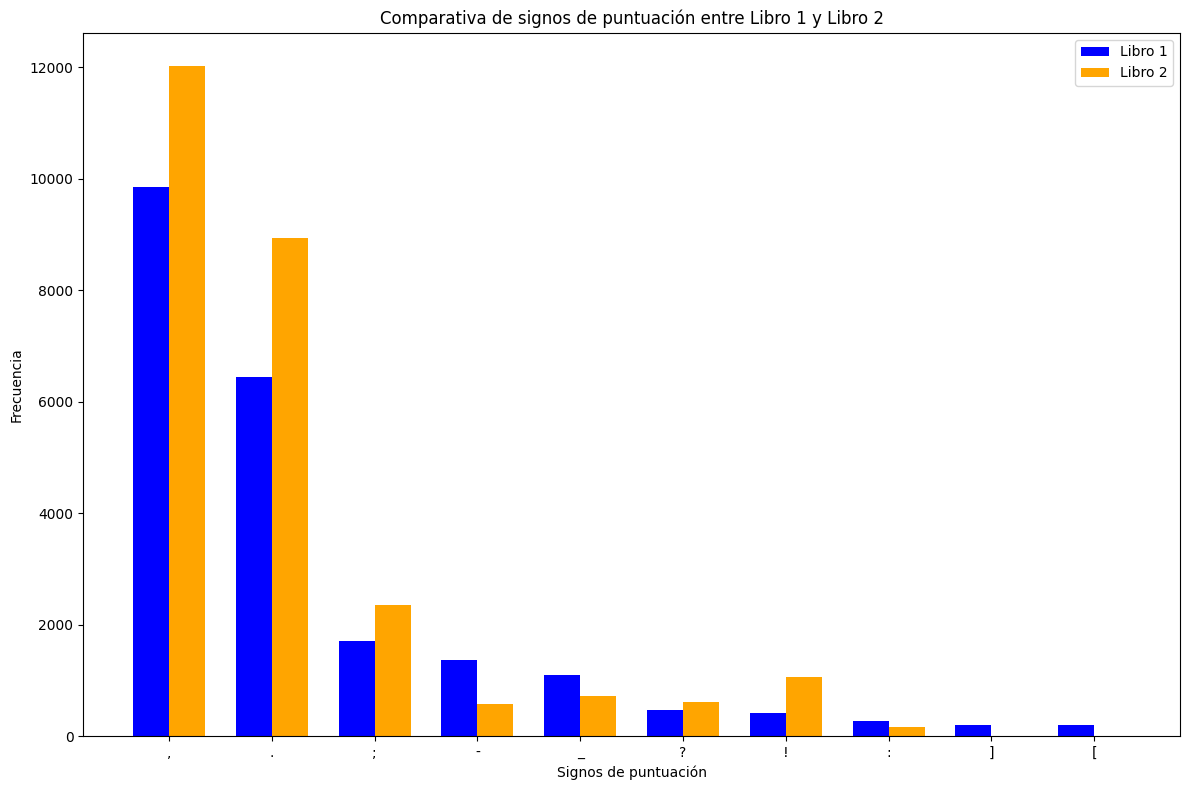

In [29]:
# Crear una gráfica comparativa de signos de puntuación entre ambos libros
def graficar_comparativa_signos(signos_1, signos_2):
    # Obtener los signos más comunes en ambos libros
    signos_comunes = set(signos_1.keys()).union(signos_2.keys())
    data = {
        "Signo": list(signos_comunes),
        "Libro 1": [signos_1.get(signo, 0) for signo in signos_comunes],
        "Libro 2": [signos_2.get(signo, 0) for signo in signos_comunes],
    }
    
    df_comparativa = pd.DataFrame(data)
    df_comparativa = df_comparativa.sort_values(by=["Libro 1", "Libro 2"], ascending=False).head(10)

    # Crear la gráfica
    plt.figure(figsize=(12, 8))
    bar_width = 0.35
    indices = range(len(df_comparativa))
    
    plt.bar(
        [i - bar_width / 2 for i in indices],
        df_comparativa["Libro 1"],
        width=bar_width,
        label="Libro 1",
        color="blue"
    )
    plt.bar(
        [i + bar_width / 2 for i in indices],
        df_comparativa["Libro 2"],
        width=bar_width,
        label="Libro 2",
        color="orange"
    )
    
    plt.xlabel('Signos de puntuación')
    plt.ylabel('Frecuencia')
    plt.title('Comparativa de signos de puntuación entre Libro 1 y Libro 2')
    plt.xticks(indices, df_comparativa["Signo"])
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generar la gráfica
graficar_comparativa_signos(signos_1, signos_2)
